In [1]:
!pip3 install pandas
!pip3 install scipy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy


In [3]:
basePath = os.path.dirname(os.path.abspath("__file__"))
print(basePath)
df = pd.read_json (basePath + '/gazefollower_calibration_data.json')

/Users/lelele/Desktop/50-dark-noglasses


<AxesSubplot:xlabel='testPointX', ylabel='testPointY'>

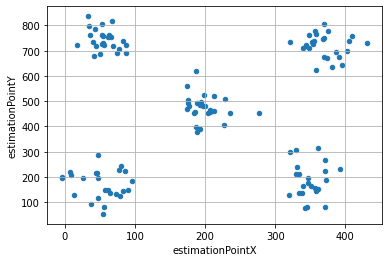

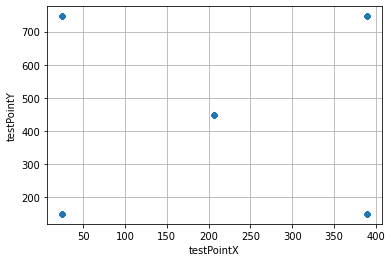

In [4]:
df.plot.scatter(x="estimationPointX", y="estimationPointY", grid=True)
df.plot.scatter(x="testPointX", y="testPointY", grid=True)



In [5]:
ppi = 326
avarageElapsedTimeForSteps = df.groupby('calibrationStep')['elapsedTime'].mean()
entireElapsedTime = df.groupby('calibrationStep')['elapsedTime'].sum()
avarageDistance = df['distanceFromDevice'].mean()

from scipy.spatial import distance
avarageEstimatedPointX = df.groupby('calibrationStep')['estimationPointX'].mean()
avarageEstimatedPointY = df.groupby('calibrationStep')['estimationPointY'].mean()

testPointX =  df.groupby('calibrationStep')['testPointX'].mean()
testPointY =  df.groupby('calibrationStep')['testPointY'].mean()

xt = testPointX.to_list()
yt = testPointY.to_list()
xa = avarageEstimatedPointX.to_list()
ya = avarageEstimatedPointY.to_list()

pointErrors = []
mmErrors = []
steps = []
for index in range(len(xt)):
    dist =  distance.euclidean([xt[index], yt[index]], [xa[index], ya[index]])
    a = dist * 2
    ErrorInMM = a * (2.54 / ppi) * 10
    pointErrors.append(str(round(dist,3)))
    mmErrors.append(str(round(ErrorInMM,3)))
    steps.append(str(index + 1))
dict = {'Step': steps, 'Error (mm)': mmErrors, 'Error (points)': pointErrors, 'Avarage elapsed time': avarageElapsedTimeForSteps, 'Elapsed time for calibration(s)': entireElapsedTime, 'Avarage distance (cm)': round(avarageDistance)}
df2 = pd.DataFrame(dict)

quality = 'low' if df['depthDataQuality'][0] == 0 else' high' 
accuracy = 'relative' if df['depthDataAccuracy'][0] == 0 else 'absolute'
print(df2)
print('Calibration took: ' + str(round(entireElapsedTime.sum() / 60,2)) + ' minutes')
print('Depth data quality: ' + quality)
print('Depth data accuracy: ' + accuracy)
print('Depth data filtered: ' + str(df['isDepthDataFiltered'][0]))
print('Number of steps: ', df.shape[0])



                Step Error (mm) Error (points)  Avarage elapsed time  \
calibrationStep                                                        
1                  1      5.106         32.768              3.857790   
2                  2      4.838         31.049              3.544937   
3                  3       4.48         28.748              2.082842   
4                  4     12.031         77.205              3.355300   
5                  5      4.573         29.346              2.295858   

                 Elapsed time for calibration(s)  Avarage distance (cm)  
calibrationStep                                                          
1                                      96.444743                     50  
2                                      88.623434                     50  
3                                      52.071061                     50  
4                                      83.882490                     50  
5                                      57.396439   